In [1]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define lattice parameters (adjust as needed)
a = 12.214  # Length along a-axis
b = 3.0371  # Length along b-axis
c = 5.7981  # Length along c-axis
alpha = np.radians(90)      # Angle between b and c (in radians)
beta = np.radians(103.83)   # Angle between a and c (in radians)
gamma = np.radians(90)      # Angle between a and b (in radians)

# 단위 벡터 화살표 추가
vectors = {
    'a': (a * np.array([np.cos(beta), (np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha), np.sqrt(1 - np.cos(beta)**2 - ((np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha))**2)]), 'red'),
    'b': (b * np.array([0, -1, 0]), 'green'),
    'c': (c * np.array([1, 0, 0]), 'blue')
}


# =====================================================================================================
# Number of lattice points in each direction (positive and negative)
num_points = [0,3]

# Generate lattice points
points = []
for i in range(-num_points[0], num_points[1] + 1):
    for j in range(-num_points[0], num_points[1] + 1):
        for k in range(-num_points[0], num_points[1] + 1):
            point = i * vectors['a'][0] + \
                    j * vectors['b'][0] + \
                    k * vectors['c'][0]
            points.append(point)

points = np.array(points)

# 3D 산점도 생성
fig = go.Figure()

# 격자점 추가 (원점)
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Origin'
))

# 모든 격자점 추가
fig.add_trace(go.Scatter3d(
    x=points[:, 0], y=points[:, 1], z=points[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Lattice Points'
))

# =====================================================================================================


for vec_name, (vector, color) in vectors.items():
    fig.add_trace(go.Scatter3d(
        x=[0, vector[0]], y=[0, vector[1]], z=[0, vector[2]],
        mode='lines',
        line=dict(color=color, width=5),
        showlegend=False,
        name=f'{vec_name}-axis'
    ))
    fig.add_trace(go.Scatter3d(
        x=[vector[0]], y=[vector[1]], z=[vector[2]],
        mode='markers',
        marker=dict(size=10, color=color, symbol='diamond', opacity=0.8),
        showlegend=False
    ))
# =====================================================================================================

# 제목과 축 레이블 설정
fig.update_layout(
    title='3D 격자점 및 단위 벡터',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# 인터랙티브한 플롯 표시
fig.show()

In [16]:
# Define lattice parameters (adjust as needed)
a = 12.214  # Length along a-axis
b = 3.0371  # Length along b-axis
c = 5.7981  # Length along c-axis
alpha = np.radians(90)      # Angle between b and c (in radians)
beta = np.radians(103.83)   # Angle between a and c (in radians)
gamma = np.radians(90)      # Angle between a and b (in radians)


# generato lattice vectors
vectors = {
    'a': (a * np.array([np.cos(beta), (np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha), np.sqrt(1 - np.cos(beta)**2 - ((np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha))**2)]).round(10), 'red'),
    'b': (b * np.array([0, 1, 0]).round(10), 'green'),
    'c': (c * np.array([1, 0, 0]).round(10), 'blue')
    
}

vec_a = vectors['a'][0]
vec_b = vectors['b'][0]
vec_c = vectors['c'][0]


# =====================================================================================================

# Normal vector to the [h k l] surface(h k l 방향의 단위벡터로 표시 하면 된다.)
h1, k1, l1 = 1,0,0
h2, k2, l2 = 0,0,1

normal_miller_index = np.cross(np.array([h1, k1, l1]), np.array([h2, k2, l2]))

# Calculate vectors in the plane of interest
vec_x = vec_a * h1 + vec_b * k1 + vec_c * l1
vec_y = vec_a * h2 + vec_b * k2 + vec_c * l2

# Normalize vec_x and vec_y to unit vectors
unit_vec_x = vec_x / np.linalg.norm(vec_x)
unit_vec_y = vec_y / np.linalg.norm(vec_y)


# surface_normal = np.cross(vec_x, vec_y)
surface_normal = np.array([0, 1.0, 0])
surface_normal /= np.linalg.norm(surface_normal)

# Generate lattice points
num_points = [0,3]  # Adjust as needed
points = []
projections = []
for i in range(-num_points[0], num_points[1] + 1):
    for j in range(-num_points[0], num_points[1] + 1):
        for k in range(-num_points[0], num_points[1] + 1):
            lattice_point = i * vec_a + j * vec_b + k * vec_c
            points.append(lattice_point)
            projection = lattice_point - np.dot(lattice_point, surface_normal) * surface_normal
            projections.append(projection)

points = np.array(points)

# Extract x, y, z coordinates for plotting
x_coords = [point[0] for point in projections]
y_coords = [point[1] for point in projections]
z_coords = [point[2] for point in projections]

# Extract x, y coordinates for plotting
x_coords_2d = [np.dot(point, unit_vec_x) for point in projections]
y_coords_2d = [np.dot(point, unit_vec_y) for point in projections]

# 3D 산점도 생성
fig = go.Figure()

# lattice vectors 그리기
for vec_name, (vector, color) in vectors.items():
    fig.add_trace(go.Scatter3d(
        x=[0, vector[0]], y=[0, vector[1]], z=[0, vector[2]],
        mode='lines',
        line=dict(color=color, width=5),
        showlegend=False,
        name=f'{vec_name}-axis'
    ))
    fig.add_trace(go.Scatter3d(
        x=[vector[0]], y=[vector[1]], z=[vector[2]],
        mode='markers',
        marker=dict(size=10, color=color, symbol='diamond', opacity=0.8),
        showlegend=False
    ))


# 격자점 추가 (원점)
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Origin'
))

# 모든 격자점 추가
fig.add_trace(go.Scatter3d(
    x=x_coords, y=y_coords, z=z_coords,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Lattice Points'
))

# =====================================================================================================
# 제목과 축 레이블 설정
# Layout adjustments for 3D graph
fig.update_layout(
    title='3D 격자점 및 단위 벡터',
    scene=dict(
        xaxis=dict(title='X', range=[-30, 30]),  # Adjust x-axis range as needed
        yaxis=dict(title='Y', range=[-10, 10]),  # Adjust y-axis range as needed
        zaxis=dict(title='Z')
    )
)

# 인터랙티브한 플롯 표시
fig.show()

In [17]:
# 2D scatter plot
fig_2d = go.Figure()

# Add projected points
fig_2d.add_trace(go.Scatter(
    x=x_coords_2d,
    y=y_coords_2d,
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Projected Points'
))

# Layout
fig_2d.update_layout(
    title='2D Projected Points',
    xaxis_title='X',
    yaxis_title='Y'
)

# Display 2D plot
fig_2d.show()

In [36]:
# Define lattice parameters (adjust as needed)
a = 12.214  # Length along a-axis
b = 3.0371  # Length along b-axis
c = 5.7981  # Length along c-axis
alpha = np.radians(90)      # Angle between b and c (in radians)
beta = np.radians(103.83)   # Angle between a and c (in radians)
gamma = np.radians(90)      # Angle between a and b (in radians)


# 단위 벡터 화살표 추가
vectors = {
    'a': (a * np.array([np.cos(beta), (np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha), np.sqrt(1 - np.cos(beta)**2 - ((np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha))**2)]), 'red'),
    'b': (b * np.array([0, -1, 0]), 'green'),
    'c': (c * np.array([1, 0, 0]), 'blue')
}
vec_a = vectors['a'][0]
vec_b = vectors['b'][0]
vec_c = vectors['c'][0]

# Calculate reciprocal lattice vectors
recip_vec_a = 2 * np.pi * np.cross(vec_b, vec_c) / np.dot(vec_a, np.cross(vec_b, vec_c))
recip_vec_b = 2 * np.pi * np.cross(vec_c, vec_a) / np.dot(vec_b, np.cross(vec_c, vec_a))
recip_vec_c = 2 * np.pi * np.cross(vec_a, vec_b) / np.dot(vec_c, np.cross(vec_a, vec_b))

recip_vectors = {
    'recip_a' : (recip_vec_a, 'red'),
    'recip_b' : (recip_vec_b, 'green'),
    'recip_c' : (recip_vec_c, 'blue')
}


# =====================================================================================================
# Generate lattice points
num_points = [10,10] # Adjust as needed
reciprocal_points = []
reciprocal_projections = []
for i in range(-num_points[0], num_points[1] + 1):
    for j in range(-num_points[0], num_points[1] + 1):
        for k in range(-num_points[0], num_points[1] + 1):
            reciprocal_lattice_point = i * recip_vec_a + j * recip_vec_b + k * recip_vec_c
            reciprocal_points.append(reciprocal_lattice_point)
            reciprocal_projection = reciprocal_lattice_point - np.dot(reciprocal_lattice_point, surface_normal) * surface_normal
            reciprocal_projections.append(reciprocal_projection)

# Extract x, y, z coordinates for plotting
x_coords = [point[0] for point in reciprocal_projections]
y_coords = [point[1] for point in reciprocal_projections]
z_coords = [point[2] for point in reciprocal_projections]

reciprocal_points = np.array(reciprocal_points)

# 3D 산점도 생성
fig = go.Figure()

# 격자점 추가 (원점)
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='black'),
    name='Origin'
))

# 모든 격자점 추가
fig.add_trace(go.Scatter3d(
    x=reciprocal_points[:, 0], y=reciprocal_points[:, 1], z=reciprocal_points[:, 2],
    mode='markers',
    marker=dict(size=2, color='blue'),
    name='Lattice Points'
))

# =====================================================================================================


for vec_name, (recip_vector, color) in recip_vectors.items():
    fig.add_trace(go.Scatter3d(
        x=[0, recip_vector[0]], y=[0, recip_vector[1]], z=[0, recip_vector[2]],
        mode='lines',
        line=dict(color=color, width=5),
        showlegend=False,
        name=f'{vec_name}-axis'
    ))
    fig.add_trace(go.Scatter3d(
        x=[recip_vector[0]], y=[recip_vector[1]], z=[recip_vector[2]],
        mode='markers',
        marker=dict(size=10, color=color, symbol='diamond', opacity=0.8),
        showlegend=False
    ))
# =====================================================================================================
# 격자점 추가 (Q point)
for i in range(11):
    Q_vector = 0.1* i * recip_vec_a + 5 * recip_vec_c
    fig.add_trace(go.Scatter3d(
        x=[Q_vector[0]], y=[Q_vector[1]], z=[Q_vector[2]],
        mode='markers',
        marker=dict(size=10, color='red'),
        name='Q point'
    ))

# 제목과 축 레이블 설정
fig.update_layout(
    title='3D 격자점 및 단위 벡터',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# 인터랙티브한 플롯 표시
fig.show()

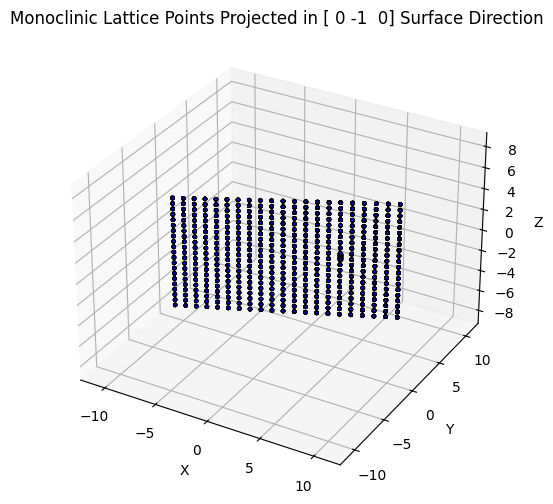

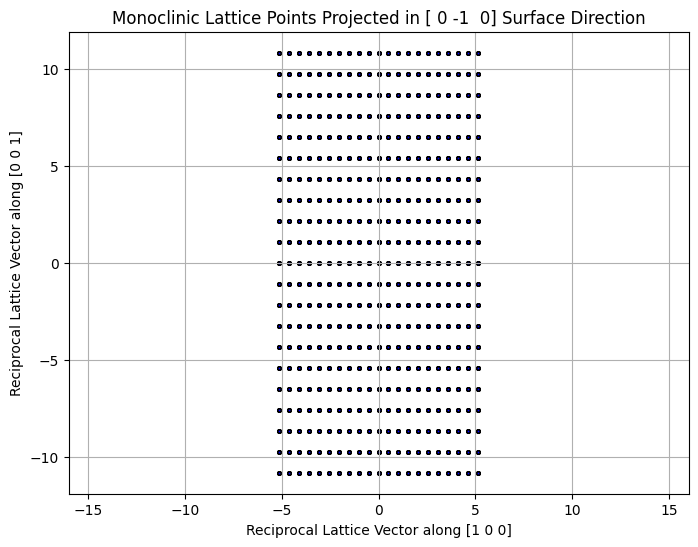

In [42]:
# Define lattice parameters (adjust as needed)
a = 12.214  # Length along a-axis
b = 3.0371  # Length along b-axis
c = 5.7981  # Length along c-axis
alpha = np.radians(90)      # Angle between b and c (in radians)
beta = np.radians(103.83)   # Angle between a and c (in radians)
gamma = np.radians(90)      # Angle between a and b (in radians)


# 단위 벡터 화살표 추가
vectors = {
    'a': (a * np.array([np.cos(beta), (np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha), np.sqrt(1 - np.cos(beta)**2 - ((np.cos(gamma) - np.cos(alpha) * np.cos(beta)) / np.sin(alpha))**2)]), 'red'),
    'b': (b * np.array([0, -1, 0]), 'green'),
    'c': (c * np.array([1, 0, 0]), 'blue')
}
vec_a = vectors['a'][0]
vec_b = vectors['b'][0]
vec_c = vectors['c'][0]

# Calculate reciprocal lattice vectors
recip_vec_a = 2 * np.pi * np.cross(vec_b, vec_c) / np.dot(vec_a, np.cross(vec_b, vec_c))
recip_vec_b = 2 * np.pi * np.cross(vec_c, vec_a) / np.dot(vec_b, np.cross(vec_c, vec_a))
recip_vec_c = 2 * np.pi * np.cross(vec_a, vec_b) / np.dot(vec_c, np.cross(vec_a, vec_b))

recip_vectors = {
    'recip_a' : (recip_vec_a, 'red'),
    'recip_b' : (recip_vec_b, 'green'),
    'recip_c' : (recip_vec_c, 'blue')
}

# Normal vector to the [h k l] surface(h k l 방향의 단위벡터로 표시 하면 된다.)
h1, k1, l1 = 1,0,0
h2, k2, l2 = 0,0,1

normal_miller_index = np.cross(np.array([h1, k1, l1]), np.array([h2, k2, l2]))

# Calculate vectors in the plane of interest
vec_x = vec_a * h1 + vec_b * k1 + vec_c * l1
vec_y = vec_a * h2 + vec_b * k2 + vec_c * l2

# Normalize vec_x and vec_y to unit vectors
unit_vec_x = vec_x / np.linalg.norm(vec_x)
unit_vec_y = vec_y / np.linalg.norm(vec_y)


# surface_normal = np.cross(vec_x, vec_y)
surface_normal = np.array([0, 1.0, 0])
surface_normal /= np.linalg.norm(surface_normal)

# =====================================================================================================
# Generate lattice points
num_points = [10,10] # Adjust as needed
reciprocal_points = []
reciprocal_projections = []
for i in range(-num_points[0], num_points[1] + 1):
    for j in range(-num_points[0], num_points[1] + 1):
        for k in range(-num_points[0], num_points[1] + 1):
            reciprocal_lattice_point = i * recip_vec_a + j * recip_vec_b + k * recip_vec_c
            reciprocal_points.append(reciprocal_lattice_point)
            reciprocal_projection = reciprocal_lattice_point - np.dot(reciprocal_lattice_point, surface_normal) * surface_normal
            reciprocal_projections.append(reciprocal_projection)

# Extract x, y, z coordinates for plotting
x_coords = [point[0] for point in reciprocal_projections]
y_coords = [point[1] for point in reciprocal_projections]
z_coords = [point[2] for point in reciprocal_projections]

reciprocal_points = np.array(reciprocal_points)

# =====================================================================================================

# Plot lattice points projected in normal surface direction
fig1 = plt.figure(figsize=(8, 6))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, color='blue', s=5, edgecolor='black')
for i in range(11):
    Q_vector = 0.1* i * recip_vec_a + 5 * recip_vec_c
    ax.scatter(Q_vector[0], Q_vector[1], Q_vector[2], color='red', s=10, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Monoclinic Lattice Points Projected in {normal_miller_index} Surface Direction')
ax.axis('equal')
plt.show()


# Extract x, y coordinates for plotting in 2D
# Extract x, y coordinates for plotting
x_coords_recip_2d = [np.dot(point, unit_vec_x) for point in reciprocal_projections]
y_coords_recip_2d = [np.dot(point, unit_vec_y) for point in reciprocal_projections]

# Plot reciprocal lattice points in 2D
fig = plt.figure(figsize=(8, 6))
plt.scatter(x_coords_recip_2d, y_coords_recip_2d, color='blue', s=5, edgecolor='black')
plt.xlabel(f'Reciprocal Lattice Vector along [{h1} {k1} {l1}]')
plt.ylabel(f'Reciprocal Lattice Vector along [{h2} {k2} {l2}]')
plt.title(f'Monoclinic Lattice Points Projected in {normal_miller_index} Surface Direction')
plt.grid(True)
plt.axis('equal')
plt.show()